# <span style="color:cornflowerblue"><center> Numerical Simulation Laboratory</center></span>
## <span style="color:cornflowerblue"><center> Samuele Brambilla - Notebook 11</center></span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
(totalmente scorrelato: è rumore bianco)

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
#in pratica è quello che normalmente fa la rete: un neurone prende un dato (x) e moltiplica per un peso
# (che deve essere ottimizzato al coeff angolare) e aggiunge un bias (che sarà poi ottimizzato al termine noto)
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np
import math
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure

# generate training inputs
np.random.seed(0) #riproducibilità
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort() #ordino in ascissa
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

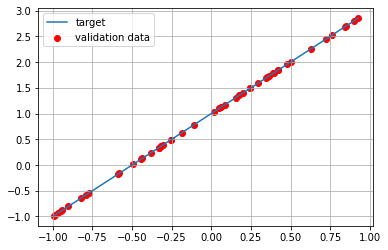

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,))) #basta un neurone perchè, again, supersemplice

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# again, la loss serve a misurare con un'altra funzione costo quello che sta succedendo

In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          #così siamo sicuri che i batch siano diversi
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 13ms/step - loss: 4.5081 - mse: 4.5081 - val_loss: 3.4413 - val_mse: 3.4413
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 3.4267 - mse: 3.4267 - val_loss: 2.6588 - val_mse: 2.6588
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 2.6489 - mse: 2.6489 - val_loss: 2.0853 - val_mse: 2.0853
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 2.0746 - mse: 2.0746 - val_loss: 1.6553 - val_mse: 1.6553
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 1.6433 - mse: 1.6433 - val_loss: 1.3189 - val_mse: 1.3189
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 1.3052 - mse: 1.3052 - val_loss: 1.0534 - val_mse: 1.0534
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 1.0394 - mse: 1.0394 - val_loss: 0.8435 - val_mse: 0.8435
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.8302 - mse: 0.8

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [7]:
# return weights and biases
model.get_weights()

[array([[1.8671087]], dtype=float32), array([0.9984835], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - mse: 0.0056

Test loss: 0.005614655092358589
Test accuracy: 0.005614655092358589


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - mse: 0.0056

Test loss: 0.005614655092358589
Test accuracy: 0.005614655092358589


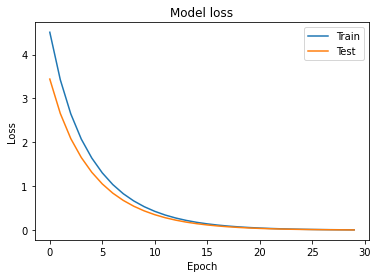

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

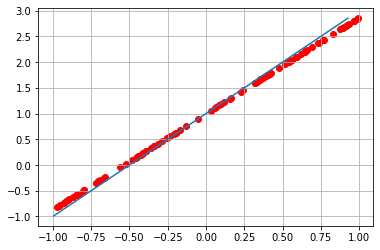

In [11]:
#utilizzo il modello per valutare la y dei punti
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

#Exercise 11.1
##Model 2: σ = 0.5; N<sub>train</sub> = 600; epochs = 20





In [12]:
# MODEL 2: generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 600)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

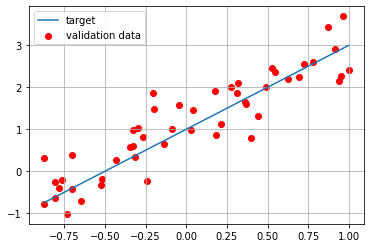

In [13]:
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#MODEL 2:
model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [15]:
# fit the model using training dataset over 20 epochs of 32 batch size each
# report training progress against validation data
history = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0) #use to not show progress, set to 2 for easier visualisation

In [16]:
# evaluate model
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.2493 - mse: 0.2493

Test loss: 0.24928981065750122
Test accuracy: 0.24928981065750122


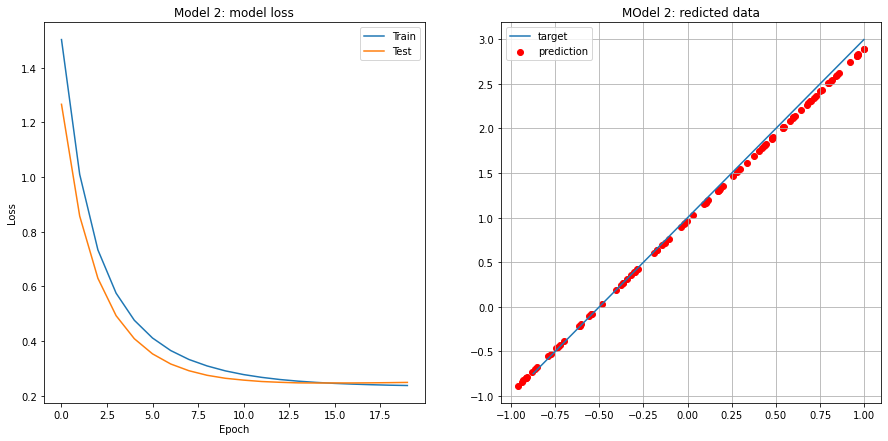

In [17]:
# Plot training & validation loss values + prediction on new data in range
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model 2: model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted,color='r', label="prediction")
ax[1].plot(x_valid, y_target, label="target")
ax[1].set_title("MOdel 2: redicted data")
ax[1].legend()
ax[1].grid(True)

##Model 3: σ = 0.7; N<sub>train</sub> = 700; epochs = 40

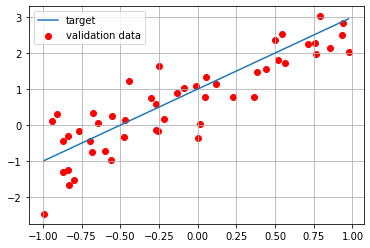

In [18]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 700)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.7 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
#MODEL 3
model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0) #use to not show progress, set to 2 for easier visualisation

In [20]:
# evaluate model
score = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.4050 - mse: 0.4050

Test loss: 0.4050450921058655
Test accuracy: 0.4050450921058655


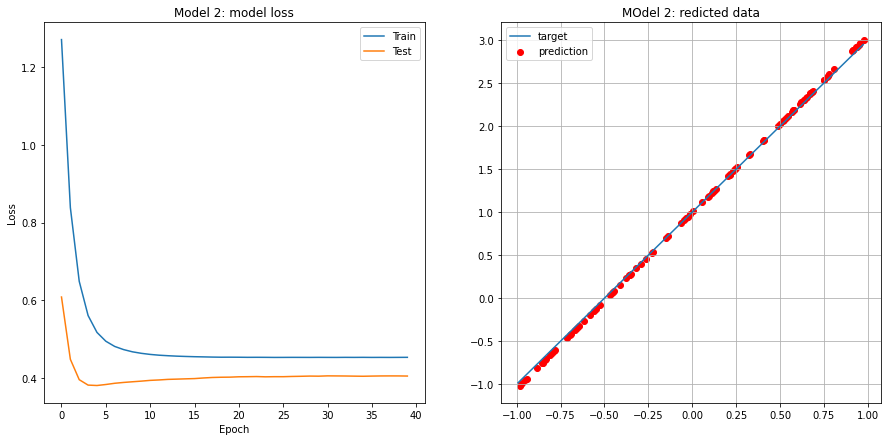

In [21]:
# Plot training & validation loss values + prediction on new data in range
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model 2: model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model3.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted,color='r', label="prediction")
ax[1].plot(x_valid, y_target, label="target")
ax[1].set_title("MOdel 2: redicted data")
ax[1].legend()
ax[1].grid(True)

##Model 4: σ = 0.2; N<sub>train</sub> = 300; epochs = 30

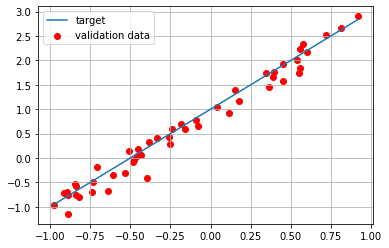

In [22]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 300)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#MODEL 4:
model4 = tf.keras.Sequential()
model4.add(Dense(1, input_shape=(1,)))
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0) #use to not show progress, set to 2 for easier visualisation

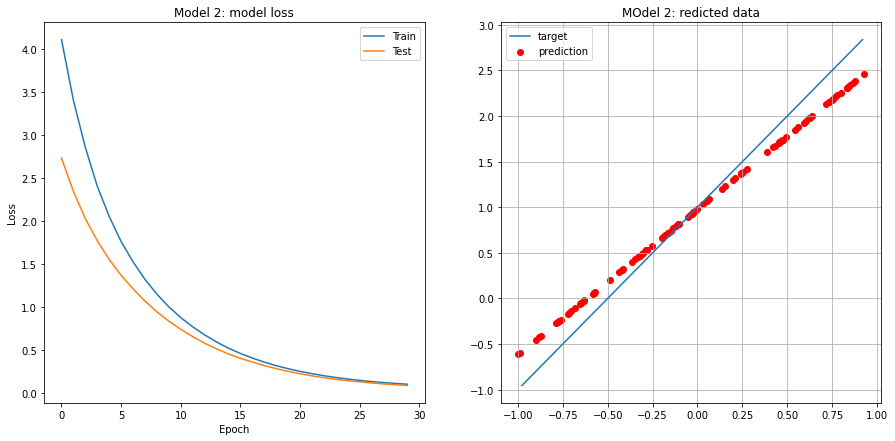

In [24]:
# Plot training & validation loss values + prediction on new data in range
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model 2: model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model4.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted,color='r', label="prediction")
ax[1].plot(x_valid, y_target, label="target")
ax[1].set_title("MOdel 2: redicted data")
ax[1].legend()
ax[1].grid(True)

##Model 5: σ = 0.5; N<sub>train</sub> = 300; epochs = 40

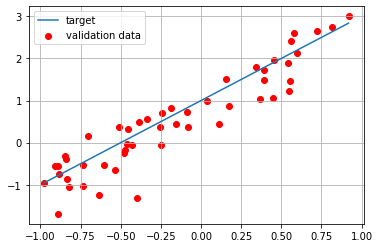

In [25]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 300)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#MODEL 5:
model5 = tf.keras.Sequential()
model5.add(Dense(1, input_shape=(1,)))
model5.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0) #use to not show progress, set to 2 for easier visualisation

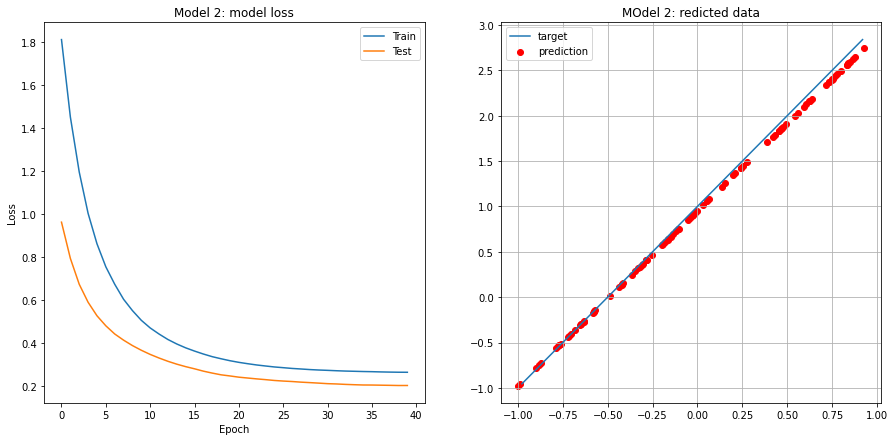

In [27]:
# Plot training & validation loss values + prediction on new data in range
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model 2: model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model5.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted,color='r', label="prediction")
ax[1].plot(x_valid, y_target, label="target")
ax[1].set_title("MOdel 2: redicted data")
ax[1].legend()
ax[1].grid(True)

In [28]:
print("\033[1mModel 2: (\tweight\t\tdata_type\tbias\t\tdata_type\t)\n\t\033[0m"+ str(model2.get_weights()) )
print("\033[1mModel 3:\n\t\033[0m"+ str(model3.get_weights()) )
print("\033[1mModel 4:\n\t\033[0m"+ str(model4.get_weights()) )
print("\033[1mModel 5:\n\t\033[0m"+ str(model5.get_weights()) )

Model 2: (	weight		data_type	bias		data_type	)
	[array([[1.9271675]], dtype=float32), array([0.9681995], dtype=float32)]
Model 3:
	[array([[2.0518804]], dtype=float32), array([0.99908125], dtype=float32)]
Model 4:
	[array([[1.5971771]], dtype=float32), array([0.9824651], dtype=float32)]
Model 5:
	[array([[1.9307277]], dtype=float32), array([0.9552853], dtype=float32)]




*   Modello 2: σ = 0.5; 600 dati di training; 20 epoche di evoluzione
*   Modello 3: σ = 0.7; 700 dati di training; 40 epoce di evoluzione
*   Modello 4: σ = 0.2; 300 dati di training; 30 epoche di evoluzione
*   Modello 5: σ = 0.5; 300 dati di training; 40 epoche di evoluzione 

Tra i modelli creati il migliore è il Modello 3 (così chiamato perchè il modello 1 era di esempio).
Confrontando i pesi dei diversi modelli è facile evincere che il numero dei dati a disposizione del modello e il numero di epoche per cui viene fatto evolvere sono proporzionali alla bontà del modello stesso: il Modello 3 è, infatti, il migliore del gruppo nonostante abbia il rumore sui dati più marcato. Al contrario, il Modello 4 è il peggiore del gruppo nonostante i dati abbiano il rumore minore.
Con il Modello 5 (che ha il doppio delle epoche di evoluzione ma la metà dei dati su cui lavorare del Modello 2 ma) ho provato a confrontare quale tra quantità dei dati di trainig e tempo di evoluzione fosse più determinante nella la bontà del modello. I risultati del Modello 5 sono del tutto simili a quelli del Modello 2, quindi suppongo che, per questo tipo di problema e per questa architettura di rete, il numero di dati e il numero di epoche siano equivalentemente importanti per la diminuzione. Una spiegazione possibile di ciò è che il training utilizza N dati (divisi in batches) per T numero di epoche: poichè la rete è composta da un neurone solo dimezzare una delle due quantità raddoppiando l'altra dovrebbe portare allo stesso risultato.
Sottolineo anche che in questo network non è necessario utilizzare una funzione di attivazione grazie alla semplicità della rettà che è perfettamente mappabile su un peso (coefficente angolare) e un bias (intercetta).

#Exercise 11.2

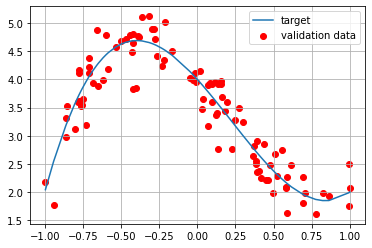

In [54]:
def pol(x):
  return 4 - 3*x -2*(x**2) + 3*(x**3)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras import optimizers, losses, metrics

# generate training inputs
np.random.seed(0) #riproducibilità
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort() #ordino in ascissa
y_target = pol(x_valid)  #ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal( pol(x_train), sigma ) #actual measures from which we want to guess regression parameters
y_valid = np.random.normal( pol(x_valid), sigma )
#plot validation data
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
#MODEL 1 - RELU ACTIVATION
Model_1 = tf.keras.Sequential()
Model_1.add(Dense( 200 , input_shape=(1,) , activation= "relu" ))
Model_1.add(Dense( 100 , activation= "relu" ))
Model_1.add(Dense( 45 , activation= "relu" ))
Model_1.add(Dense( 1  , activation= "relu"))
Model_1.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mse'])

#MODEL 2 - SELU ACTIVATION
Model_2 = tf.keras.Sequential()
Model_2.add(Dense( 100 , input_shape=(1,) , activation= "selu" ))
Model_2.add(Dense( 45  , activation= "selu" ))
Model_2.add(Dense( 1  , activation= "selu" ))
Model_2.compile(optimizer=tf.keras.optimizers.Adamax(), loss="mse", metrics=['mse'])

#MODEL 3 - SOFTPLUS ACTIVATION
Model_3 = tf.keras.Sequential()
Model_3.add(Dense( 100 , input_shape=(1,) , activation= "softplus" ))
Model_3.add(Dense( 40 ,  activation= "softplus" ))
Model_3.add(Dense( 1 ,  activation= "softplus" ))
Model_3.compile(optimizer=tf.keras.optimizers.Nadam(), loss='mse', metrics=['mse'])

#MODEL 4 - SIGMOID
Model_4 = tf.keras.Sequential()
Model_4.add(Dense( 100 , input_shape=(1,) , activation= "sigmoid" ))
Model_4.add(Dense( 40 ,  activation= "sigmoid" ))
Model_4.add(Dense( 1 ))
Model_4.compile(optimizer="sgd", loss='mse', metrics=['mse'])

#MODEL 5 - TANH
Model_5 = tf.keras.Sequential()
Model_5.add(Dense( 100 , input_shape=(1,) , activation= "tanh" ))
Model_5.add(Dense( 40 ,  activation= "tanh" ))
Model_5.add(Dense( 1 ))
Model_5.compile(optimizer="sgd", loss='mse', metrics=['mse'])

#MODEL 6 - COMPOSITE
Model_6 = tf.keras.Sequential()
Model_6.add(Dense( 100 , input_shape=(1,) , activation= "relu" ))
Model_6.add(Dense( 40 ,  activation= "elu" ))
Model_6.add(Dense( 1 ,  activation= "softplus" ))
Model_6.compile(optimizer="sgd", loss='mse', metrics=['mse'])

In [56]:
history_1 = Model_1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_valid, y_valid),
          verbose=0) #use to not show progress, set to 2 for easier visualisation

In [57]:
history_2 = Model_2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_valid, y_valid),
          verbose=0) #use to not show progress, set to 2 for easier visualisation

In [58]:
history_3 = Model_3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_valid, y_valid),
          verbose=0) #use to not show progress, set to 2 for easier visualisation

In [59]:
history_4 = Model_4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_valid, y_valid),
          verbose=0) #use to not show progress, set to 2 for easier visualisation

In [60]:
history_5 = Model_5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_valid, y_valid),
          verbose=0) #use to not show progress, set to 2 for easier visualisation

In [61]:
history_6 = Model_6.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(x_valid, y_valid),
          verbose=0) #use to not show progress, set to 2 for easier visualisation

In [62]:
# evaluate model
score_1 = Model_1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_2 = Model_2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_3 = Model_3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_4 = Model_4.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_5 = Model_5.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_6 = Model_6.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print("\n\033[1mModel 1:\033[0m")
print('\tTest loss:', score_1[0])
print('\tTest accuracy:', score_1[1])

print("\n\033[1mModel 2:\033[0m")
print('\tTest loss:', score_2[0])
print('\tTest accuracy:', score_2[1])

print("\n\033[1mModel 3:\033[0m")
print('\tTest loss:', score_3[0])
print('\tTest accuracy:', score_3[1])

print("\n\033[1mModel 4:\033[0m")
print('\tTest loss:', score_4[0])
print('\tTest accuracy:', score_4[1])

print("\n\033[1mModel 5:\033[0m")
print('\tTest loss:', score_5[0])
print('\tTest accuracy:', score_5[1])

print("\n\033[1mModel 6:\033[0m")
print('\tTest loss:', score_6[0])
print('\tTest accuracy:', score_6[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.1240 - mse: 0.1240

Model 1:
	Test loss: 0.11101667582988739
	Test accuracy: 0.11101667582988739

Model 2:
	Test loss: 0.1195063367486
	Test accuracy: 0.1195063367486

Model 3:
	Test loss: 0.1559087038040161
	Test accuracy: 0.1559087038040161

Model 4:
	Test loss: 0.49266788363456726
	Test accuracy: 0.49266788363456726

Model 5:
	Test loss: 0.1151704341173172
	Test accuracy: 0.1151704341173172

Model 6:
	Test loss: 0.12403368204832077
	Test accuracy: 0.12403368204832077


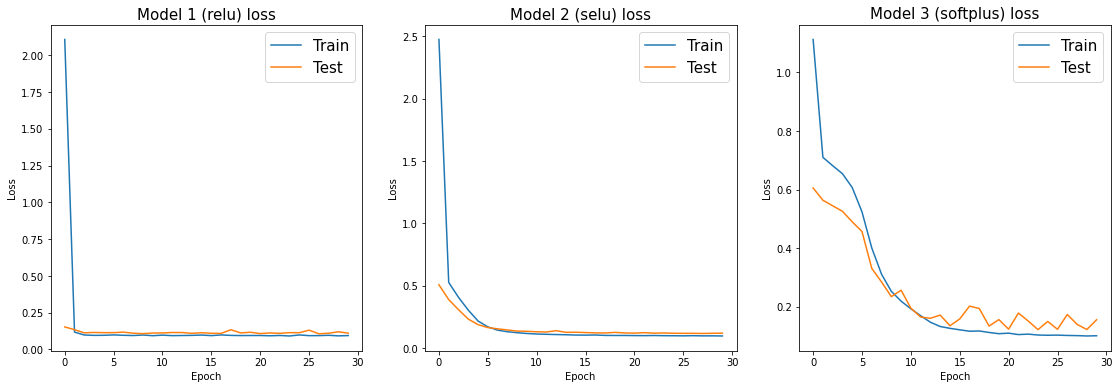

In [63]:
#plot loss
fig , ax = plt.subplots( 1 , 3 , figsize=(19 , 6))
ax[0].plot(history_1.history['loss'])
ax[0].plot(history_1.history['val_loss'])
ax[0].set_title('Model 1 (relu) loss', fontsize=15)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best', prop={'size':15})

ax[1].plot(history_2.history['loss'])
ax[1].plot(history_2.history['val_loss'])
ax[1].set_title('Model 2 (selu) loss', fontsize=15)
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best', prop={'size':15})

ax[2].plot(history_3.history['loss'])
ax[2].plot(history_3.history['val_loss'])
ax[2].set_title('Model 3 (softplus) loss', fontsize=15)
ax[2].set_ylabel('Loss')
ax[2].set_xlabel('Epoch')
ax[2].legend(['Train', 'Test'], loc='best', prop={'size':15})

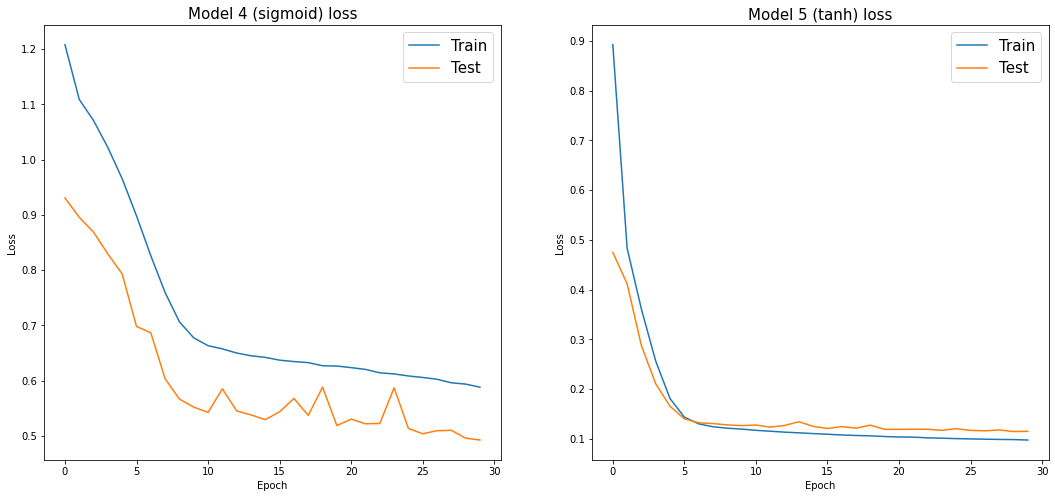

In [64]:
fig , ax = plt.subplots( 1 , 2 , figsize=(18 , 8))
ax[0].plot(history_4.history['loss'])
ax[0].plot(history_4.history['val_loss'])
ax[0].set_title('Model 4 (sigmoid) loss', fontsize=15)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best', prop={'size':15})

ax[1].plot(history_5.history['loss'])
ax[1].plot(history_5.history['val_loss'])
ax[1].set_title('Model 5 (tanh) loss', fontsize=15)
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best', prop={'size':15})

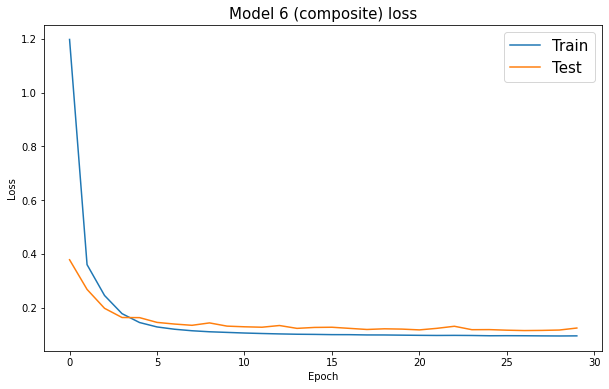

In [65]:
fig , ax = plt.subplots(figsize=(10 , 6))
ax.plot(history_6.history['loss'])
ax.plot(history_6.history['val_loss'])
ax.set_title('Model 6 (composite) loss', fontsize=15)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='best', prop={'size':15})

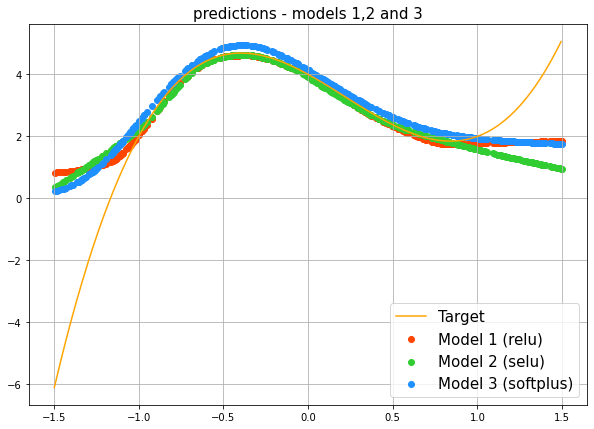

In [66]:
# PREDICTION FOR MODELS 1,2 AND 3 (NON SATURATED ACTIVATION FUNCTION)
fig , ax = plt.subplots(figsize=(10 , 7))
x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()
y_target = pol( x_valid )  # ideal (target) linear function
ax.plot(x_valid, y_target , color = "orange" , label = "Target")

x_predicted = np.random.uniform(-1.5, 1.5, 400)
y_predicted_1 = Model_1.predict(x_predicted)
y_predicted_2 = Model_2.predict(x_predicted)
y_predicted_3 = Model_3.predict(x_predicted)
ax.scatter(x_predicted, y_predicted_1 ,color='orangered' , label = "Model 1 (relu)")
ax.scatter(x_predicted, y_predicted_2 ,color='limegreen' , label = "Model 2 (selu)")
ax.scatter(x_predicted, y_predicted_3 ,color='dodgerblue' , label = "Model 3 (softplus)")
ax.set_title("predictions - models 1,2 and 3", fontsize = 15)
ax.legend(loc="best", prop={'size':15})
ax.grid(True)

I tre modelli differiscono tra loro per le funzioni di attivazione utilizzate, rispettivamente relu, selu e softplus, tutte funzioni che non saturano l'input. Il Modello 1 è il più profondo dei tre, avendo un layer iniziale aggiuntivo di 200 neuroni.
Gli ottimizzatori usati sono Adamax e Nadam. 
In tutti e tre i casi è stata usata come loss function mse.
Il fatto che le previsioni delle tre reti siano molto simili nell'intervallo di training indica che il layer aggiuntivo nel Modello 1 sembra essere superfluo, non porta significativi miglioramenti delle performance.
Non si notano grandi differenze tra i tre ottimizzatori della famiglia di Adam, almeno per quanto riguarda questa applicazione.
È, infine, facile notare dal grafico delle predizioni come i modelli non riescano a fare previsioni al di fuori dell'intervallo dei dati in cui è stato fatto il training, come aspettato.

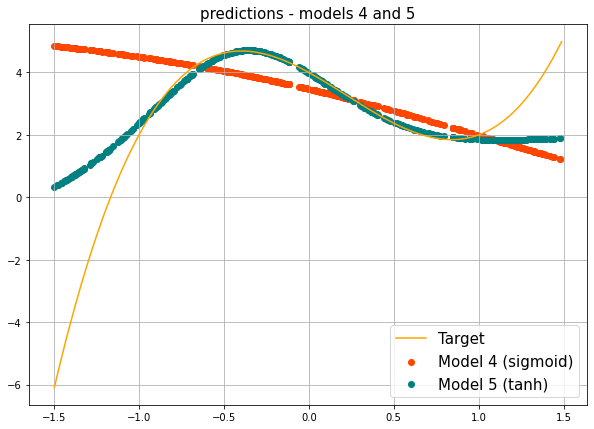

In [67]:
# PREDICTION FOR MODELS 4 AND 5 (SATURATED ACTIVATION FUNCTION)
fig , ax= plt.subplots(figsize=(10 , 7))
x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()
y_target = pol( x_valid )  # ideal (target) linear function
ax.plot(x_valid, y_target , color = "orange" , label = "Target")

x_predicted = np.random.uniform(-1.5, 1.5, 400)
y_predicted_1 = Model_4.predict(x_predicted)
y_predicted_2 = Model_5.predict(x_predicted)
ax.scatter(x_predicted, y_predicted_1 ,color='orangered' , label = "Model 4 (sigmoid)")
ax.scatter(x_predicted, y_predicted_2 ,color='teal' , label = "Model 5 (tanh)")
ax.set_title("predictions - models 4 and 5", fontsize = 15)
ax.legend(loc="best", prop={'size':15})
ax.grid(True)

I modelli 4 e 5 sono utilizzano due funzioni di attivazione con plateau.
Come si vede facilmente dal grafico delle predizioni e della loss function, una funzione di attivazione sigmoide non riesce a predirre correttamente il modello.
Anche aumentando il numero di layer presenti nella rete il risultato rimane lo stesso.
Sottolineo che in questi modelli, diversamente dagli altri, il layer di output non ha una funzione di attivazione (quindi ha attivazione lineare, puramente con bias e peso): utilizzando la funzione di attivazione corrispondente (sigmoideper modello 4 e tanh per modello 5), le predizioni del modello venivano completamente saturate a 1.

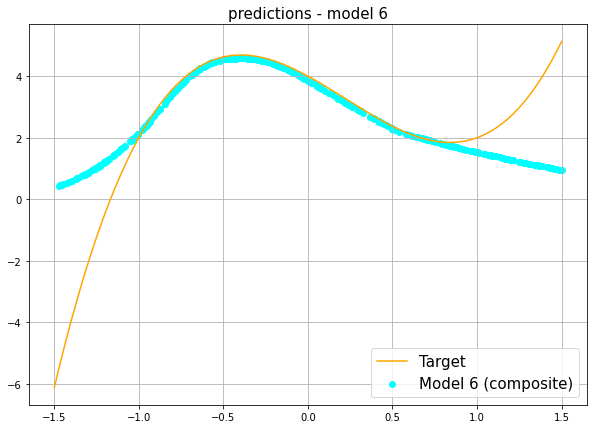

In [68]:
# PREDICTION FOR MODELS 6 (DIFFERENT ACTIVATION FUNCTION)
fig , ax = plt.subplots(figsize=(10 , 7))
x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()
y_target = pol( x_valid )  # ideal (target) linear function
ax.plot(x_valid, y_target , color = "orange" , label = "Target")

x_predicted = np.random.uniform(-1.5, 1.5, 400)
y_predicted_1 = Model_6.predict(x_predicted)
ax.scatter(x_predicted, y_predicted_1 ,color='cyan' , label = "Model 6 (composite)")
ax.set_title("predictions - model 6", fontsize = 15)
ax.legend(loc="best", prop={'size':15})
ax.grid(True)

Il Modello 6 è profondo quanto i modelli 2 e 3 (tre layer di, rispettivamente, 100, 40 e 1 neurone) ma ogni layer utilizza una funzione di attivazione diversa. Tra le funzioni di attivazione non ho usato funzioni con plateau, in quanto esse saturano l'input (come visto nei modelli 4 e 5).
Le previsioni di queste funzione sono buone e la sua funzione loss è paragonabile ai primi tre modelli: per questa task quindi non è influente la scelta della funzione di attivazione della rete, basta che questa non saturi i dati di input.

# Exercise 11.3

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Text(0.5, 0.92, 'Training data')

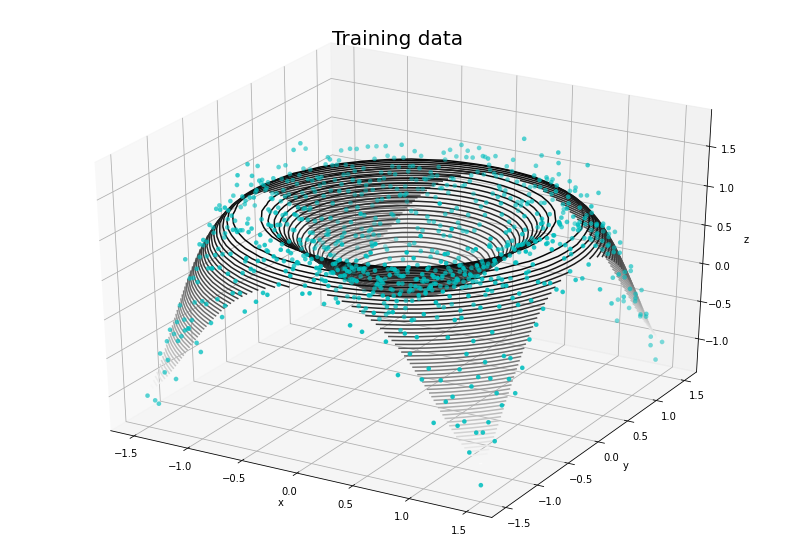

In [ ]:
def f(x , y):
    return np.sin(x**2 + y**2)

np.random.seed(0)
data_train = np.random.uniform( low = -1.5 , high= 1.5 , size=(1000 , 2) )
data_valid = np.random.uniform( low = -1.5 , high= 1.5 , size=(150 , 2) )
data_valid.sort()
data_target = f( data_valid[:,0] , data_valid[:,1] ) 

sigma = 0.2
f_train = np.random.normal( f( data_train[:,0] , data_train[:,1] ) , sigma )
f_valid = np.random.normal( data_target , sigma )

#Plotting the target function and the training data
from mpl_toolkits import mplot3d
fig = plt.figure(figsize= (14 , 10))
ax = plt.axes(projection='3d')
x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

ax.contour3D(X, Y, Z, 50, cmap='binary')
X, Y, np.meshgrid(x, y)
Z = np.random.normal(f(X, Y), sigma)
ax.scatter(X, Y, Z, color='c', linewidth=0.1);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Training data', fontsize=20)

In [ ]:
#create model
Net = tf.keras.Sequential()
Net.add( Dense( 200, input_shape=(2,), activation="relu") )
Net.add( Dense( 130 , activation="relu" ) )
Net.add( Dense( 50, activation="relu") )
Net.add( Dense( 1, activation="relu") )
   
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
Net.compile( loss='mean_squared_error', optimizer=opt , metrics=['mse'] )

In [ ]:
history = Net.fit(x=data_train, y=f_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(data_valid, f_valid),
          verbose=0)

In [ ]:
# evaluate model
score = Net.evaluate(data_valid, f_valid, batch_size=32, verbose=1)
# print performance
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 3ms/step - loss: 0.0665 - mse: 0.0665

Test loss: 0.06647974997758865
Test accuracy: 0.06647974997758865


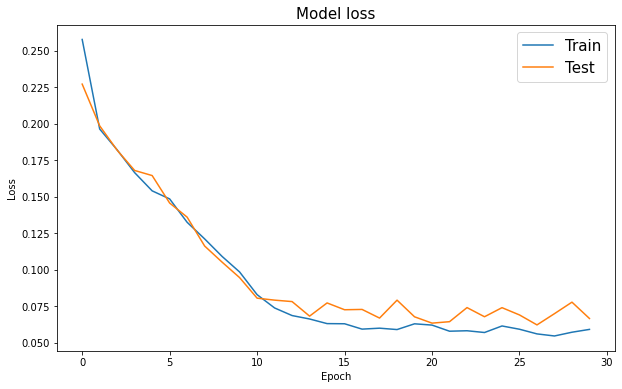

In [ ]:
fig , ax = plt.subplots(figsize=(10 , 6))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Model loss', fontsize=15)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='best', prop={'size':15})

(-0.5, 99.5, -0.5, 99.5)

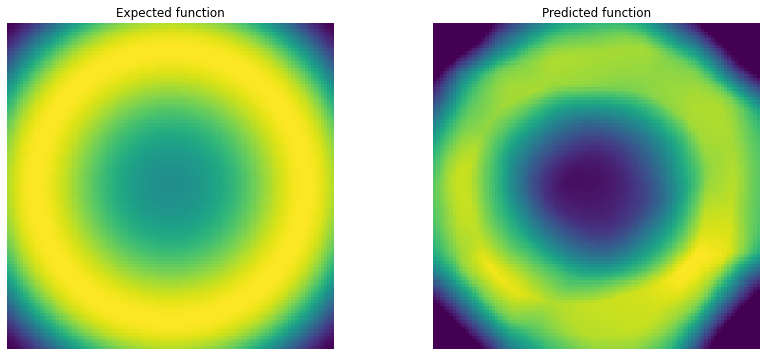

In [ ]:
fig , ax = plt.subplots( 1 , 2 , figsize= (14 , 6) )

x = np.linspace(-1.5 , 1.5 , 100)
y = np.linspace(-1.5 , 1.5 , 100)
X,Y = np.meshgrid(x, y) # grid of point
Z = f(X, Y) # evaluation of the function on the grid
img = ax[0].imshow( Z , origin="lower")
ax[0].axis('off')
#fig.colorbar(img)
ax[0].set_title("Expected function")

data_in = np.zeros( [100*100,2] )
data_in[:,0]=X.flatten()
data_in[:,1]=Y.flatten()
f_pred = Net.predict(data_in)

ax[1].imshow( f_pred.reshape( (100,100) )  , origin='lower' )
ax[1].set_title("Predicted function")
ax[1].axis('off')

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


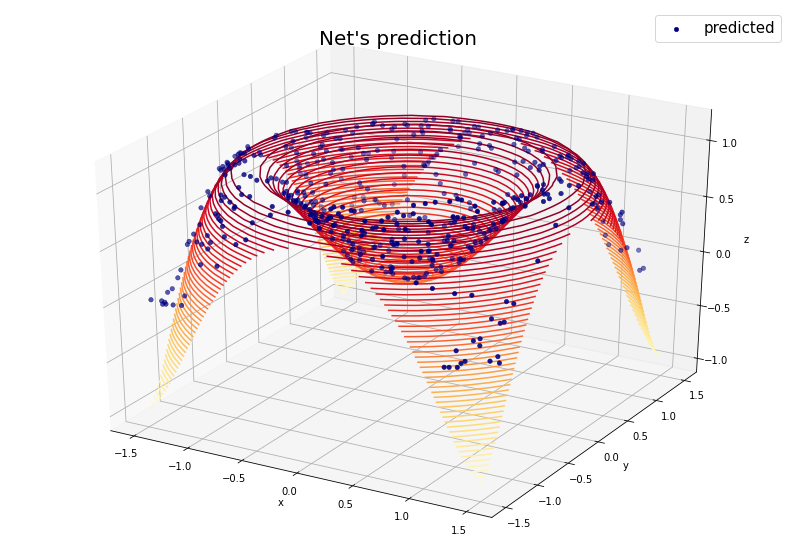

In [ ]:
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)
X, Y = np.meshgrid(x, y) #return coordinate matrices from coordinate vectors.
Z = f(X, Y)
ax.contour3D(X, Y, Z, 50, cmap='YlOrRd') #binary

x_predicted = np.random.uniform(-1.5, 1.5, size=(500,2))
y_predicted = Net.predict(x_predicted)

ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, color='navy', linewidth=0.5, label='predicted')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title( "Net's prediction", fontsize = 20 )
ax.legend(prop={'size':15})

Per il fit di una funzione bidimensionale ho usato una rete più profonda, composta da 4 layers con attivazione "relu". L'ottimizzatore usato è Adam, che è risultato essere più effeciente nei precedenti esercizi svolti.
Per il training più dati che nei casi precedenti, così che le predizioni potessero essere migliori: come si vede dai grafici, infatti, il modello riesce a predire con buona accuratezza la funzione. La loss function finale raggiunge un valore 0.067 e le previsioni rispecchiano la funzione target in maniera fedele.